In [5]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from os import listdir
from os.path import isfile, join
import pandas as pd
import csv
import re
import string
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.lines import Line2D



In [76]:

def transformDataframe(frame):
#     frame['texture'] = frame.apply (lambda row: row.imagename.split('_')[6].split('.')[0].split('-')[1].rstrip(string.digits), axis=1)
    frame['texture'] = frame.apply (lambda row: row.imagename.split('/')[4].split('.')[0].split('-')[1].rstrip(string.digits), axis=1)
    frame['correct_t'] = frame.apply(lambda row:  1 if row.object_response == row.texture else 0, axis=1)
    frame['correct_s'] =  frame.apply(lambda row:  1 if row.object_response == row.category else 0, axis=1)
    frame['correct'] = frame.apply(lambda row:  1 if row.correct_t == 1 or row.correct_s == 1 else 0, axis=1)
    frame['total'] = frame.apply(lambda row:  1, axis=1)
    display(frame)
    return frame[['texture', 'category','correct_t', 'correct_s', 'correct', 'total']]

In [77]:
# directory = "../raw-data/style-transfer-512-nomask-experiment/"
directory ="./fig4results/"
datafiles = [f for f in listdir(directory) if isfile(join(directory, f)) and f.endswith('.csv') and 'subject' not in f]
scatterdata = {}
itemOrder = ['bicycle', 'clock', 'chair', 'bottle', 'truck', 'car', 'bird', 'oven', 'elephant', 'cat', 'keyboard', 'dog', 'bear', 'airplane', 'knife', 'boat' ]

modelname = re.compile('experiment_(.*)_session')
for file in datafiles:
    name = modelname.findall(file)[0]
    if name:
        print(name)
        filedata = pd.read_csv(directory+file)
        filedata = transformDataframe(filedata)
        summed_filedata = filedata.groupby(['category']).sum()
        summed_filedata['correct_fraction'] = summed_filedata['correct'] / summed_filedata['total']
        only_cue = filedata[filedata.texture != filedata.category]
        summed_only_cue = only_cue.groupby(['category']).sum()
        summed_only_cue['shape_fraction'] = summed_only_cue['correct_s'] / summed_only_cue['correct']
        summed_only_cue['texture_fraction'] = summed_only_cue['correct_t'] / summed_only_cue['correct']
        dataset = pd.concat([summed_only_cue[['shape_fraction', 'correct_s', 'correct']], summed_filedata[['correct_fraction']]], axis=1)
        dataset = dataset.reindex(itemOrder)
        display(dataset)
        scatterdata[name] = dataset
        

    
barplotdata= {}
for name in scatterdata:
    for row in scatterdata[name].itertuples():
        if row.Index not in barplotdata:
            barplotdata[row.Index] = {}
        barplotdata[row.Index][name] = row.correct_fraction

alexnet


,subj,session,trial,rt,object_response,category,condition,imagename,texture,correct_t,correct_s,correct,total
0,alexnet,1,1,0,bicycle,airplane,1,../stimuli/style-transfer-preprocessed-512/air...,bicycle,1,0,1,1
1,alexnet,1,2,0,chair,airplane,2,../stimuli/style-transfer-preprocessed-512/air...,chair,1,0,1,1
2,alexnet,1,3,0,clock,airplane,3,../stimuli/style-transfer-preprocessed-512/air...,clock,1,0,1,1
3,alexnet,1,4,0,elephant,airplane,4,../stimuli/style-transfer-preprocessed-512/air...,elephant,1,0,1,1
4,alexnet,1,5,0,airplane,airplane,5,../stimuli/style-transfer-preprocessed-512/air...,airplane,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,alexnet,1,1276,0,truck,truck,1276,../stimuli/style-transfer-preprocessed-512/tru...,boat,0,1,1,1
1276,alexnet,1,1277,0,truck,truck,1277,../stimuli/style-transfer-preprocessed-512/tru...,bottle,0,1,1,1
1277,alexnet,1,1278,0,truck,truck,1278,../stimuli/style-transfer-preprocessed-512/tru...,chair,0,1,1,1
1278,alexnet,1,1279,0,elephant,truck,1279,../stimuli/style-transfer-preprocessed-512/tru...,elephant,1,0,1,1


,shape_fraction,correct_s,correct,correct_fraction
category,,,,
bicycle,0.500000,21,42,0.5750
clock,0.653061,32,49,0.6750
chair,0.288462,15,52,0.7125
bottle,0.351852,19,54,0.7250
truck,0.482759,28,58,0.7750
car,0.375000,18,48,0.6500
bird,0.055556,2,36,0.4875
oven,0.219512,9,41,0.5625
elephant,0.051282,2,39,0.5500


googlenet


,subj,session,trial,rt,object_response,category,condition,imagename,texture,correct_t,correct_s,correct,total
0,googlenet,1,1,0,knife,airplane,1,../stimuli/style-transfer-preprocessed-512/air...,bicycle,0,0,0,1
1,googlenet,1,2,0,bottle,airplane,2,../stimuli/style-transfer-preprocessed-512/air...,chair,0,0,0,1
2,googlenet,1,3,0,elephant,airplane,3,../stimuli/style-transfer-preprocessed-512/air...,clock,0,0,0,1
3,googlenet,1,4,0,elephant,airplane,4,../stimuli/style-transfer-preprocessed-512/air...,elephant,1,0,1,1
4,googlenet,1,5,0,oven,airplane,5,../stimuli/style-transfer-preprocessed-512/air...,airplane,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,googlenet,1,1276,0,oven,truck,1276,../stimuli/style-transfer-preprocessed-512/tru...,boat,0,0,0,1
1276,googlenet,1,1277,0,knife,truck,1277,../stimuli/style-transfer-preprocessed-512/tru...,bottle,0,0,0,1
1277,googlenet,1,1278,0,knife,truck,1278,../stimuli/style-transfer-preprocessed-512/tru...,chair,0,0,0,1
1278,googlenet,1,1279,0,chair,truck,1279,../stimuli/style-transfer-preprocessed-512/tru...,elephant,0,0,0,1


,shape_fraction,correct_s,correct,correct_fraction
category,,,,
bicycle,0.200000,1,5,0.0625
clock,0.750000,15,20,0.2500
chair,0.500000,5,10,0.1250
bottle,0.708333,17,24,0.3125
truck,0.250000,1,4,0.0500
car,0.000000,0,7,0.0875
bird,0.000000,0,5,0.0625
oven,0.666667,8,12,0.1500
elephant,0.428571,3,7,0.0875


resnet50


,subj,session,trial,rt,object_response,category,condition,imagename,texture,correct_t,correct_s,correct,total
0,resnet50,1,1,0,bicycle,airplane,1,../stimuli/style-transfer-preprocessed-512/air...,bicycle,1,0,1,1
1,resnet50,1,2,0,chair,airplane,2,../stimuli/style-transfer-preprocessed-512/air...,chair,1,0,1,1
2,resnet50,1,3,0,clock,airplane,3,../stimuli/style-transfer-preprocessed-512/air...,clock,1,0,1,1
3,resnet50,1,4,0,elephant,airplane,4,../stimuli/style-transfer-preprocessed-512/air...,elephant,1,0,1,1
4,resnet50,1,5,0,keyboard,airplane,5,../stimuli/style-transfer-preprocessed-512/air...,airplane,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,resnet50,1,1276,0,truck,truck,1276,../stimuli/style-transfer-preprocessed-512/tru...,boat,0,1,1,1
1276,resnet50,1,1277,0,bottle,truck,1277,../stimuli/style-transfer-preprocessed-512/tru...,bottle,1,0,1,1
1277,resnet50,1,1278,0,car,truck,1278,../stimuli/style-transfer-preprocessed-512/tru...,chair,0,0,0,1
1278,resnet50,1,1279,0,elephant,truck,1279,../stimuli/style-transfer-preprocessed-512/tru...,elephant,1,0,1,1


,shape_fraction,correct_s,correct,correct_fraction
category,,,,
bicycle,0.302326,13,43,0.5875
clock,0.740741,40,54,0.7375
chair,0.081633,4,49,0.6500
bottle,0.439394,29,66,0.8875
truck,0.365079,23,63,0.8500
car,0.396552,23,58,0.7750
bird,0.000000,0,49,0.6750
oven,0.173913,8,46,0.6375
elephant,0.065217,3,46,0.6375


vgg16


,subj,session,trial,rt,object_response,category,condition,imagename,texture,correct_t,correct_s,correct,total
0,vgg16,1,1,0,bicycle,airplane,1,../stimuli/style-transfer-preprocessed-512/air...,bicycle,1,0,1,1
1,vgg16,1,2,0,chair,airplane,2,../stimuli/style-transfer-preprocessed-512/air...,chair,1,0,1,1
2,vgg16,1,3,0,clock,airplane,3,../stimuli/style-transfer-preprocessed-512/air...,clock,1,0,1,1
3,vgg16,1,4,0,elephant,airplane,4,../stimuli/style-transfer-preprocessed-512/air...,elephant,1,0,1,1
4,vgg16,1,5,0,airplane,airplane,5,../stimuli/style-transfer-preprocessed-512/air...,airplane,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,vgg16,1,1276,0,truck,truck,1276,../stimuli/style-transfer-preprocessed-512/tru...,boat,0,1,1,1
1276,vgg16,1,1277,0,bottle,truck,1277,../stimuli/style-transfer-preprocessed-512/tru...,bottle,1,0,1,1
1277,vgg16,1,1278,0,chair,truck,1278,../stimuli/style-transfer-preprocessed-512/tru...,chair,1,0,1,1
1278,vgg16,1,1279,0,elephant,truck,1279,../stimuli/style-transfer-preprocessed-512/tru...,elephant,1,0,1,1


,shape_fraction,correct_s,correct,correct_fraction
category,,,,
bicycle,0.063830,3,47,0.6375
clock,0.388889,21,54,0.7375
chair,0.018868,1,53,0.7250
bottle,0.183333,11,60,0.8125
truck,0.241935,15,62,0.8250
car,0.300000,18,60,0.8125
bird,0.000000,0,57,0.7750
oven,0.072727,4,55,0.7500
elephant,0.017857,1,56,0.7625


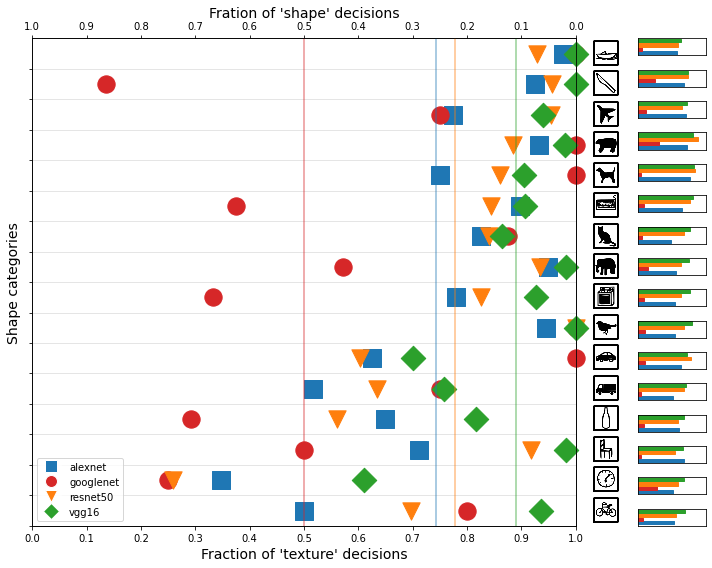

In [78]:
fig = plt.figure(figsize=(10,8))
spec2 = fig.add_gridspec(16, 16)
main = fig.add_subplot(spec2[:, 0:13])

xticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
main.set_xticks(xticks)
main.set_ylim(0, 16)
main.set_yticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
main.set_yticklabels([])
main.yaxis.grid(True, alpha=0.4)
main.set_xlabel("Fraction of 'texture' decisions", fontsize=14)
main.set_ylabel('Shape categories', fontsize=14)

shapeAxis = main.twiny()
shapeAxis.set_xticks(xticks)
shapeAxis.set_xlim(0, 1)
shapeAxis.invert_xaxis()
shapeAxis.set_xlabel("Fration of 'shape' decisions", fontsize=14)

itemOrder = ['bicycle', 'clock', 'chair', 'bottle', 'truck', 'car', 'bird', 'oven', 'elephant', 'cat', 'keyboard', 'dog', 'bear', 'airplane', 'knife', 'boat' ]



for i, label in enumerate(itemOrder):
        img = plt.imread(f'../data-analysis/category-images/{label}.png')
        im = OffsetImage(img, zoom=0.20)
        im.image.axes = main
        ab = AnnotationBbox(im, (1, i), xybox=(30, 16), frameon=False,
                        xycoords='data', boxcoords="offset points", pad=0)
        main.add_artist(ab)

colors = ['tab:blue', 'tab:red', 'tab:orange', 'tab:green', 'tab:purple', 'tab:cyan', 'tab:gray']
markers = ['s', 'o', 'v', 'D', 'P', 'p', '*']

legend_elements = []
for i, item in enumerate(scatterdata):
    x_avg = scatterdata[item].correct_s.mean() / scatterdata[item].correct.mean()
    plt.plot([x_avg, x_avg], [0, 16], c=colors[i], alpha=0.5)
    scatter = plt.scatter(scatterdata[item].shape_fraction.values, np.arange(0, 16) + 0.5, s=300, c=colors[i],  marker=markers[i])
    scatter.set_clip_on(False)
    legend_elements.append(Line2D([0], [0], color='w', markerfacecolor=colors[i], markersize=12, marker=markers[i], label=item))
   
    
    
    
for i, category in enumerate(scatterdata[item].index.values):
    barfig = fig.add_subplot(spec2[i, 14:16])
    barfig.set_xlim(0, 1)
    barfig.xaxis.set_visible(False)
    barfig.yaxis.set_visible(False)
    y_pos = np.arange(len(barplotdata[category]))
    barplot = barfig.barh(y_pos, barplotdata[category].values(), align='center')
    for j in y_pos:
        barplot[j].set_color(colors[j])

main.legend(handles=legend_elements, loc='lower left')
plt.tight_layout()
plt.margins(0.1)
# plt.show()
plt.savefig('./fig4results/figure.png', dpi=95, facecolor='w')


